# Logistic Regresion
### Luis Chunga

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd
import time
import nltk

###  Reading data 

In [2]:
start_time = time.time()
Corpus = pd.read_csv("input/email_dataset.csv",encoding = "latin")
# Display First five
Corpus

,email,category
0,forwarded by frank ermis hou ect on pm matthew...,0
1,i would like to rsvp my wife laura and myself ...,0
2,according to my calculations the term needs to...,0
3,forwarded by frank ermis hou ect on pm dale ne...,0
4,rhino here,0
...,...,...
2943,free sizzling ltc sales materials ltc prospect...,1
2944,rape rape sex click here you must be at least ...,1
2945,gb q want to establish the office in china f s...,1
2946,re wall street micro news report homeland secu...,1


In [3]:
### The dataset has 2 class, which 0 is Email and 1 is spam 
### There are 2033 unique email out of 2087 
### There are 1356 unique spam out of 1360 

Corpus.groupby('category').describe()

email                                                               
         count unique                                                top freq
category                                                                     
0         1588   1544  thanks debra perlingiere enron north america c...   12
1         1360   1355  returned mail see transcript for details the o...    2

Text(0.5, 1.0, 'Number of Emails and Spams')

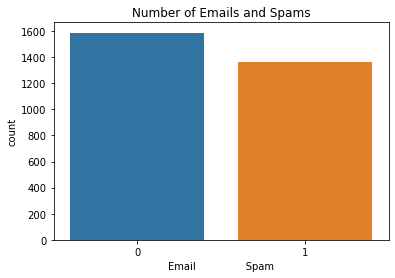

In [4]:
# Display
sns.countplot(Corpus.category)
plt.xlabel('Email                Spam')
plt.title('Number of Emails and Spams')

In [16]:
len(Corpus['category'])

2948

In [6]:
vectorizer = TfidfVectorizer("english")

In [7]:
# vectorize the corpus email 
message_mat = vectorizer.fit_transform(Corpus['email'])

### Splitting 80% for training and 20% for testing

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(message_mat, 
                                                    Corpus['category'], 
                                                    test_size=0.2, 
                                                    random_state=20)

In [9]:
#
lr = LogisticRegression(solver='lbfgs', max_iter=2000, random_state=0).fit(X_train, Y_train)
yhat = lr.predict(X_test)

# the 3 lines below show how to invoke various output    
print("\n","-> Accuracy",accuracy_score(Y_test, yhat))
print("\n"," -> Classification Report\n",classification_report(Y_test, yhat),sep="")
print("\n","-> Classification Report\n",confusion_matrix(Y_test, yhat),sep="")


 -> Accuracy 0.9661016949152542

 -> Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       333
           1       0.93      1.00      0.96       257

    accuracy                           0.97       590
   macro avg       0.96      0.97      0.97       590
weighted avg       0.97      0.97      0.97       590


-> Classification Report
[[313  20]
 [  0 257]]


In [10]:
print("{:.2f} seconds".format(time.time() - start_time))

1.40 seconds


In [11]:

X_train[1][0]


<1x19990 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


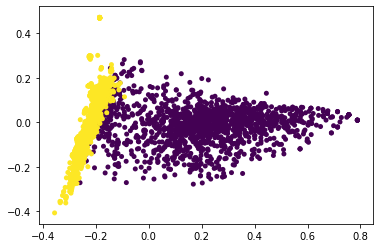

In [13]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(Corpus.email).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1], c=Corpus.category, s=4, linewidths=3 )


plt.show()              #not required if using ipython notebook





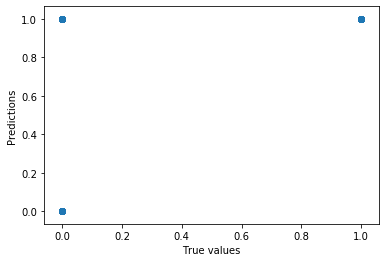

In [14]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Make cross validated predictions
predictions = cross_val_predict(lr, X_train, Y_train, cv=6)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.scatter(Y_train, predictions)

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

import nltk

tokenized_word=[]
fdist = FreqDist()
for i in Corpus.email:
  
    for word in word_tokenize(i):
        fdist[word] += 1
        
fdist.plot(30,cumulative=False)
plt.show()
